In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

url = "https://www.amazon.in/s?k=laptops"  # Replace with your search URL
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    titles = soup.find_all("span", class_="a-size-medium a-color-base a-text-normal")
    prices = soup.find_all("span", class_="a-price-whole")
    ratings = soup.find_all("span", class_="a-icon-alt")
    
    data = []
    for title, price, rating in zip(titles, prices, ratings):
        data.append({
            "Title": title.text.strip(),
            "Price (₹)": price.text.strip(),
            "Rating": rating.text.strip(),        
        })
    if data:
        df = pd.DataFrame(data)
        output_folder = r"C:\NISHANT\Practice\Web Scraping\Amazon"
        output_file = os.path.join(output_folder,"amazon_products.xlsx")
        df.to_excel(output_file, index=False)
        print(f"data saved to {output_file}")
    else:
        print("No data scraped.please check the structure of the page")
else:
    print(f"Failed to fetch page: {response.status_code}")


data saved to C:\NISHANT\Practice\Web Scraping\Amazon\amazon_products.xlsx


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Base URL to scrape
base_url = "https://www.amazon.in/s?k=laptops"

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        titles = soup.find_all("span", class_="a-size-medium a-color-base a-text-normal")
        prices = soup.find_all("span", class_="a-price-whole")
        ratings = soup.find_all("span", class_="a-icon-alt")
    
        
        page_data = []
        for title, price, rating, in zip(titles, prices, ratings):
            page_data.append({
                "Title": title.text.strip(),
                "Price (₹)": price.text.strip(),
                "Rating": rating.text.strip(),
            })
        return page_data
    else:
        print(f"Failed to fetch page: {response.status_code}")
        return []

# Loop through multiple pages
def scrape_multiple_pages(start_page, end_page):
    all_data = []
    for page in range(start_page, end_page + 1):
        print(f"Scraping Page {page}...")
        page_url = f"{base_url}&page={page}"  # Add page parameter
        page_data = scrape_page(page_url)
        if page_data:
            all_data.extend(page_data)
        else:
            print(f"No data found on Page {page}")
    return all_data
def clean_price(price):
    # remove symbol and commas,and convert to numeric
    return float (price.replace("₹","").replace(",","").strip())

# Scrape data from multiple pages and save to Excel
if __name__ == "__main__":
    start_page = 1  # Starting page number
    end_page = 16    # Ending page number

    data = scrape_multiple_pages(start_page, end_page)
    
    if data:
        # Create DataFrame and save to Excel
        df = pd.DataFrame(data)
        # clean the price column and convert to numeric
        df["Price (₹)"] = df["Price (₹)"].apply(clean_price)
        # sort by price in ascending order
        df = df.sort_values(by = "Price (₹)",ascending=True)
        
        output_folder = r"C:\NISHANT\Practice\Web Scraping\Amazon"
        os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist
        output_file = os.path.join(output_folder, "amazon_products.xlsx")
        df.to_excel(output_file, index=False)
        print(f"Data saved to {output_file}")
    else:
        print("No data scraped. Please check the structure of the pages.")


Scraping Page 1...
Scraping Page 2...
Scraping Page 3...
Scraping Page 4...
Scraping Page 5...
Scraping Page 6...
Scraping Page 7...
Scraping Page 8...
Scraping Page 9...
Scraping Page 10...
Scraping Page 11...
Scraping Page 12...
Scraping Page 13...
Scraping Page 14...
Scraping Page 15...
Scraping Page 16...
Data saved to C:\NISHANT\Practice\Web Scraping\Amazon\amazon_products.xlsx


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\Nishant shah\AppData\Local\Temp\ipykernel_28372\661668408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Price (₹)",y = "Title",data = filter_df,palette='viridis')


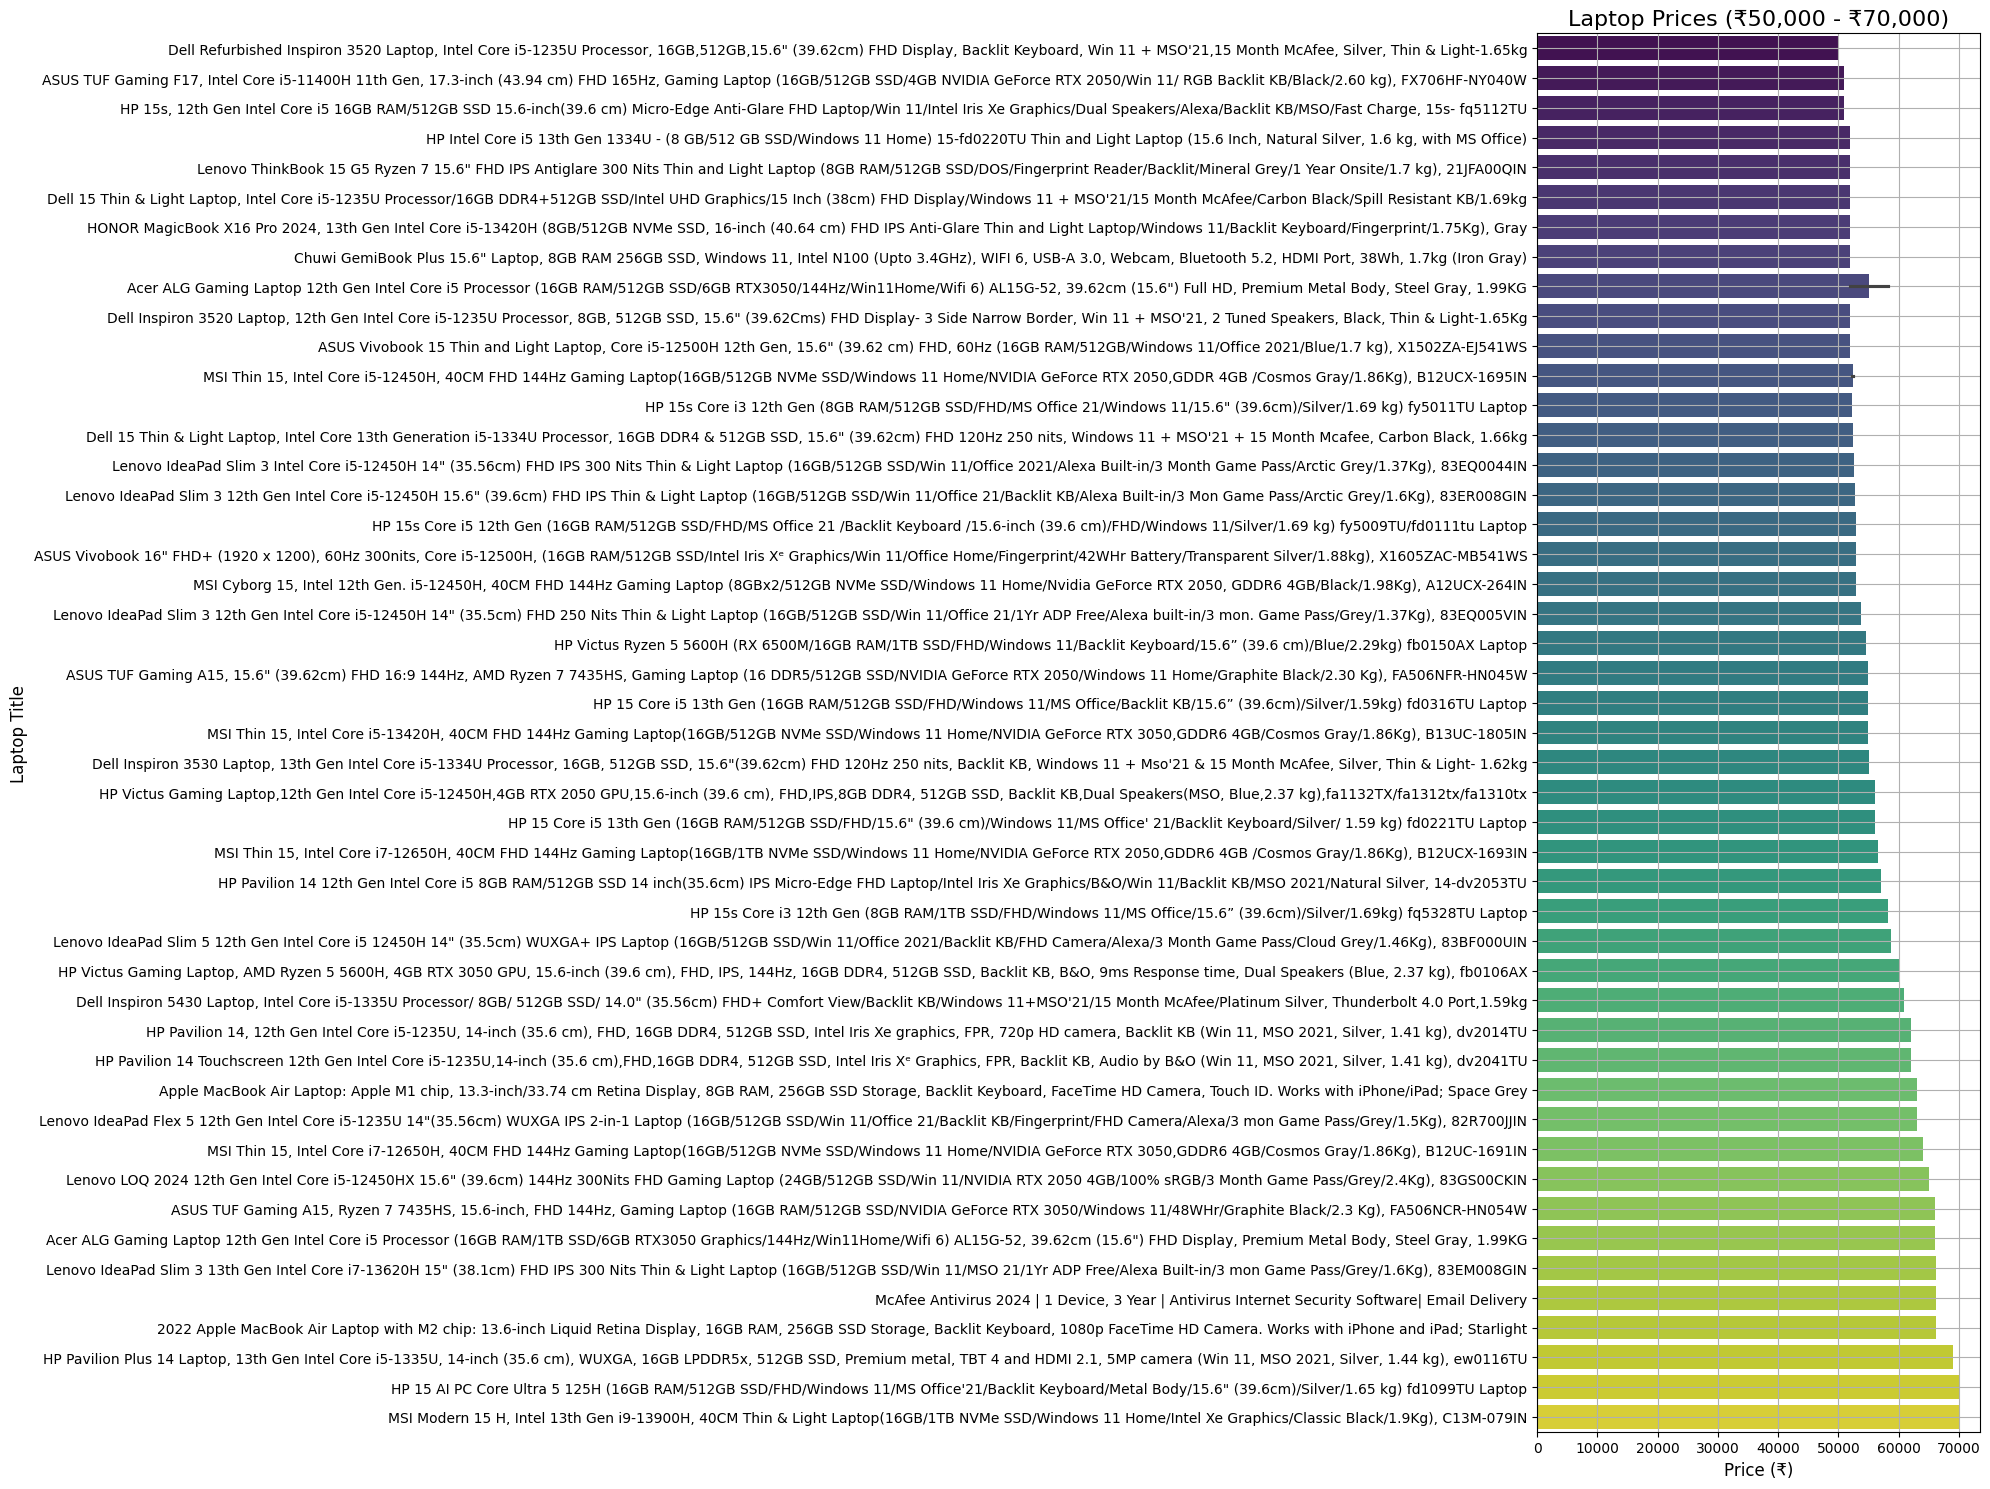

In [12]:
# Compare Laptop Price
df = pd.read_excel(r"C:\NISHANT\Practice\Web Scraping\Amazon\amazon_products_laptop.xlsx")
filter_df = df[(df["Price (₹)"]>=50000) & (df["Price (₹)"]<=70000)]
plt.figure(figsize=(20,15))
sns.barplot(x="Price (₹)",y = "Title",data = filter_df,palette='viridis')
plt.title("Laptop Prices (₹50,000 - ₹70,000)", fontsize=16)
plt.xlabel("Price (₹)", fontsize=12)
plt.ylabel("Laptop Title", fontsize=12)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Nishant shah\AppData\Local\Temp\ipykernel_28372\3204950787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df["Rating (Numeric)"] = filter_df["Rating"].str.split().str[0].astype(float)


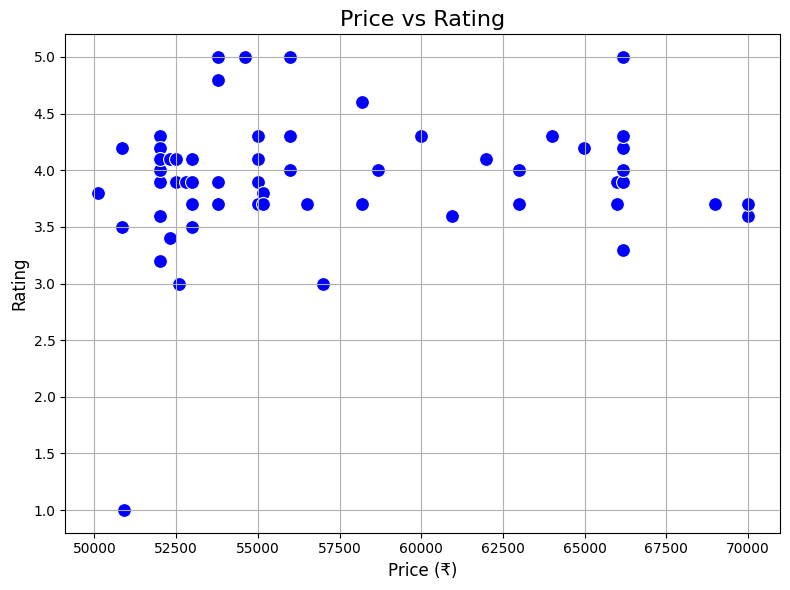

In [19]:
# Extract numeric ratings from the "Rating" column
filter_df["Rating (Numeric)"] = filter_df["Rating"].str.split().str[0].astype(float)

# Scatter plot for Price vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Price (₹)", y="Rating (Numeric)", data=filter_df, color="blue", s=100)
plt.title("Price vs Rating", fontsize=16)
plt.xlabel("Price (₹)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


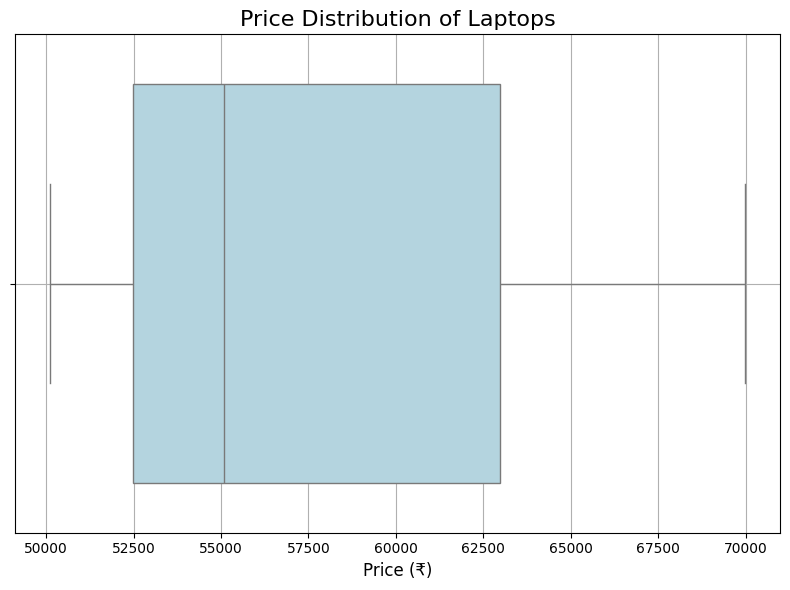

In [22]:
# Box plot for Price distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x="Price (₹)", data=filter_df, color="lightblue")
plt.title("Price Distribution of Laptops", fontsize=16)
plt.xlabel("Price (₹)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


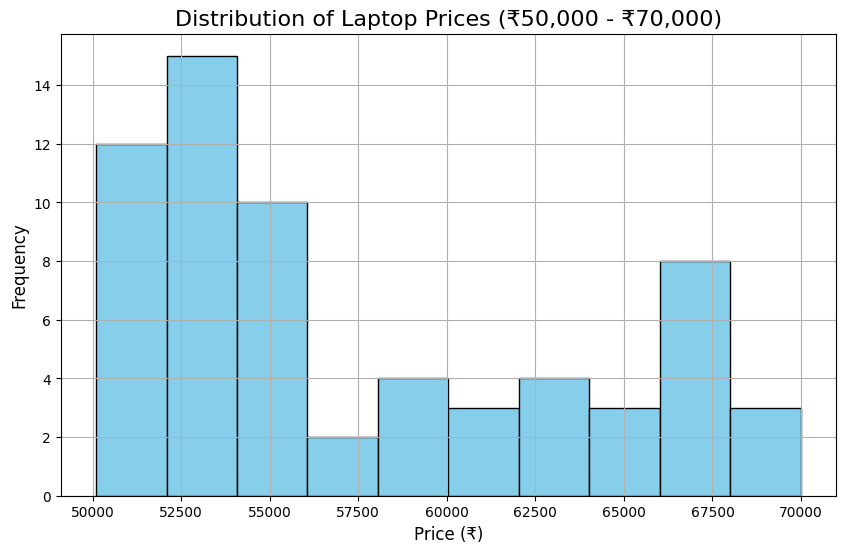

In [23]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the laptop data
prices = df['Price (₹)'].apply(pd.to_numeric, errors='coerce')  # Convert price column to numeric

# Filter for prices between 50,000 and 70,000
filtered_prices = prices[(prices >= 50000) & (prices <= 70000)]

# Plotting the histogram
plt.figure(figsize=(10,6))
plt.hist(filtered_prices, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Prices (₹50,000 - ₹70,000)', fontsize=16)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


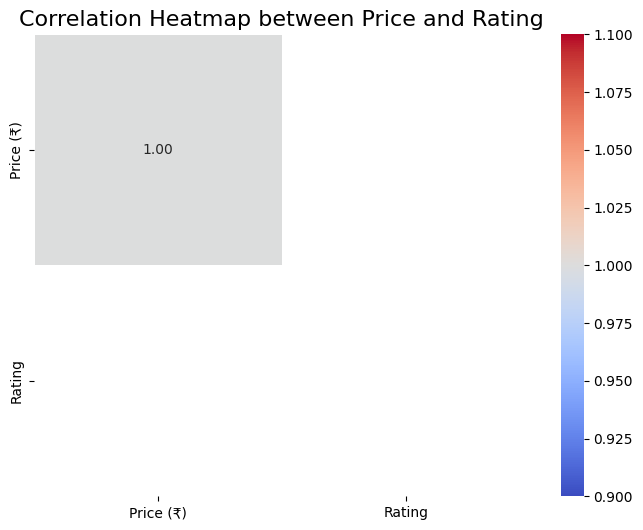

In [24]:
import seaborn as sns

# Assuming you have 'Price (₹)' and 'Rating' columns
# First, ensure that 'Rating' column is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Create a correlation matrix
correlation_matrix = df[['Price (₹)', 'Rating']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Price and Rating', fontsize=16)
plt.show()
